<a href="https://colab.research.google.com/github/Gabe-Pasqual/time_series_forecasting/blob/main/prev_acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
(95, 2)
  mes_ano  fechamento
0  1/2015       29.29
1  2/2015       32.12
2  3/2015       31.11
3  4/2015       31.29
4  5/2015       32.57


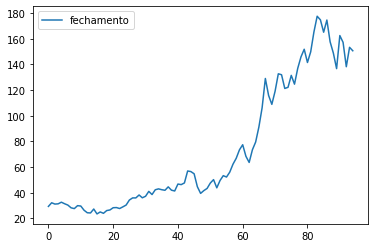

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2022-01-01  153.381032  139.981785  167.542766
1 2022-02-01  153.076866  139.852088  167.400155
2 2022-03-01  155.705911  142.833969  169.491364
3 2022-04-01  155.881391  141.462134  169.076097
4 2022-05-01  155.553120  142.142186  168.859252


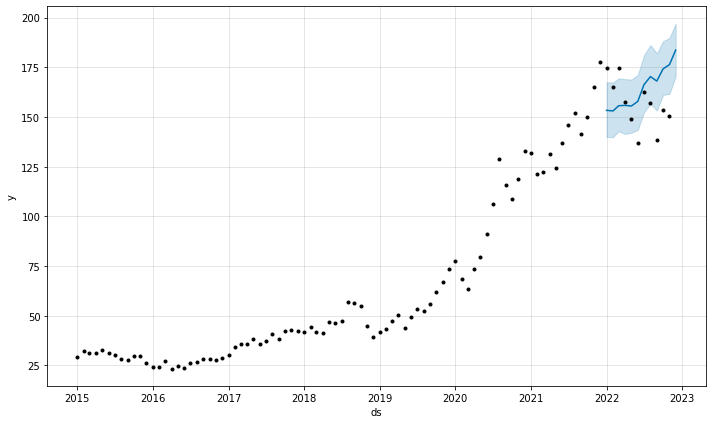

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2023-01-01  185.335596  171.767495  198.966917
1 2023-02-01  183.403549  169.563196  196.930427
2 2023-03-01  193.461676  180.988416  206.678475
3 2023-04-01  191.138820  176.786814  205.053701
4 2023-05-01  189.322304  174.500047  203.272698


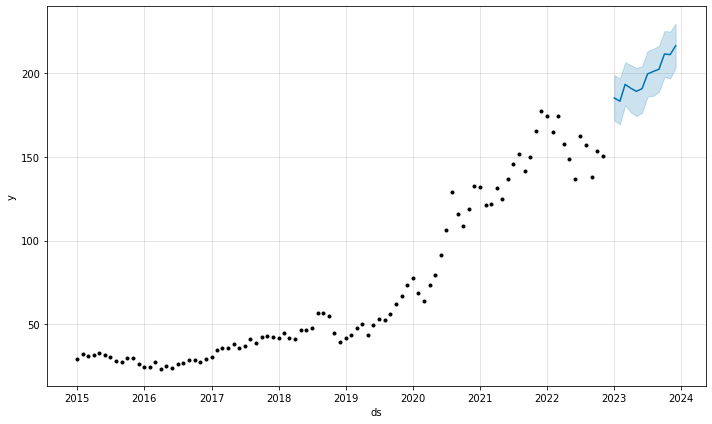

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


           ds       y
78 2021-07-01  145.86
79 2021-08-01  151.83
80 2021-09-01  141.50
81 2021-10-01  149.80
82 2021-11-01  165.30
MAE: 31.088


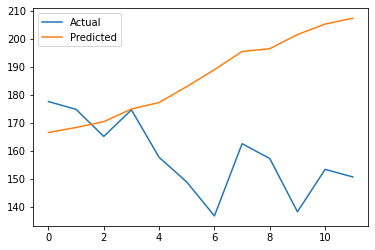

In [15]:
!pip install pystan~=2.14
!pip install fbprophet
#!pip install localpip 
#!localpip install fbprophet
# print version number
#print('Prophet %s' % prophet.__version__)

# carregar base de dados histórica das ações
from pandas import read_csv
path = 'https://raw.githubusercontent.com/Gabe-Pasqual/time_series_forecasting/main/DataBase_Investing.csv'
df = read_csv(path, header=0)
print(df.shape)

# teste tabela e gráfico
print(df.head())
from pandas import read_csv
from matplotlib import pyplot
path = 'https://raw.githubusercontent.com/Gabe-Pasqual/time_series_forecasting/main/DataBase_Investing.csv'
df = read_csv(path, header=0)
df.plot()
pyplot.show()

#-------------------------------------------------------------------------------------------------------------------
#previsão dentro do intervalo de tempo do dataset
# bibliotecas para o forecast
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet

# carregando base histórica
path = 'https://raw.githubusercontent.com/Gabe-Pasqual/time_series_forecasting/main/DataBase_Investing.csv'
df = read_csv(path, header=0)

# propriedades do dataset
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
model = Prophet()
model.fit(df)
future = list()
for i in range(1, 13):
	date = '2022-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

# função de previsão usando o modelo de dados
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# mostrar forecast no gráfico
model.plot(forecast)
pyplot.show()

#-------------------------------------------------------------------------------------------------------------------
#previsão foraa do intervalo de tempo do dataset
# bibliotecas para o forecast

# carregando base histórica
path = 'https://raw.githubusercontent.com/Gabe-Pasqual/time_series_forecasting/main/DataBase_Investing.csv'
df = read_csv(path, header=0)

# propriedades do dataset
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
model = Prophet()
model.fit(df)
future = list()
for i in range(1, 13):
	date = '2023-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

# função de previsão usando o modelo de dados
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# mostrar forecast no gráfico
model.plot(forecast)
pyplot.show()

#-------------------------------------------------------------------------------------------------------------------
# evaluate prophet time series forecasting model on hold out dataset
from sklearn.metrics import mean_absolute_error
# load data
path = 'https://raw.githubusercontent.com/Gabe-Pasqual/time_series_forecasting/main/DataBase_Investing.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2022-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()